**Importing Libraries**

In [1]:
import pandas as pd
from naive_bayes import MultinomialNaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from testing import k_fold_cross_validation

**Loading Data**

In [2]:
df = pd.read_csv('datasets/sale.csv')
print(df.columns)
df

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'satisfied '],
      dtype='object')


,User ID,Gender,Age,EstimatedSalary,Purchased,satisfied
0,15624510,Male,19,19000,0,no
1,15810944,Male,35,20000,0,no
2,15668575,Female,26,43000,0,no
3,15603246,Female,27,57000,0,no
4,15804002,Male,19,76000,0,no
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,yes
396,15706071,Male,51,23000,1,yes
397,15654296,Female,50,20000,1,yes
398,15755018,Male,36,33000,0,yes


**Data Pre-processing**

In [3]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [4]:
min_age = min(df['Age'].value_counts().keys())
max_age = max(df['Age'].value_counts().keys())
print(min_age)
print(max_age)

18
60


In [5]:
def to_discrete(value, min, max, group_count):

    total_length = max - min + 1
    group_length = total_length / group_count

    if value > max: return group_count
    elif value < min: return - 1
    else:
        return (value - min) // group_length

In [6]:
df['Age_Discrete'] = df['Age'].map(lambda value: to_discrete(value, min_age, max_age, 10))
df['Age_Discrete'].value_counts()

3.0    67
4.0    60
5.0    50
6.0    49
2.0    46
1.0    37
0.0    28
9.0    25
7.0    23
8.0    15
Name: Age_Discrete, dtype: int64

In [7]:
min_salary = min(df['EstimatedSalary'].value_counts().keys())
max_salary = max(df['EstimatedSalary'].value_counts().keys())
print(min_salary)
print(max_salary)

15000
150000


In [8]:
df['Salary_Discrete'] = df['EstimatedSalary'].map(lambda value: to_discrete(value, min_salary, max_salary, 10))
df['Salary_Discrete'].value_counts()

4.0    81
2.0    53
0.0    51
3.0    51
5.0    44
1.0    44
9.0    22
7.0    20
6.0    18
8.0    16
Name: Salary_Discrete, dtype: int64

In [9]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
df['satisfied '].value_counts()

yes    300
no     100
Name: satisfied , dtype: int64

**Feature Variables and Target Variable**

In [11]:
X = df.loc[:, ["Gender", "Age_Discrete", "Salary_Discrete", "satisfied "]]
y = df.loc[:, "Purchased"]

# print(X)
# print(Y)

**Train-Test Split Method**

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

mnb = MultinomialNaiveBayesClassifier(alpha=1)
mnb.fit(X_train, y_train)

In [37]:
y_pred=mnb.predict(X_test)

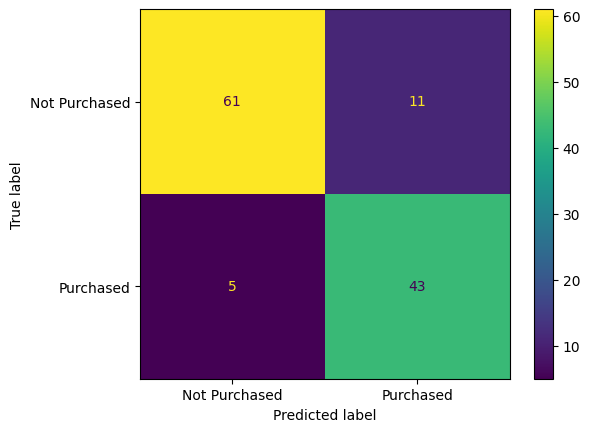

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Not Purchased", "Purchased"])
cm_display.plot()
plt.show()

In [39]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8666666666666667


**K-Fold Cross-Validation Method** 

In [40]:
# Cross validation

score = k_fold_cross_validation(mnb.fit, mnb.predict, mnb.reset, X, y, 10)
print(score)

0.875
